# Importing the data

The dataset I used is https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data?select=TWO_CENTURIES_OF_UM_RACES.csv 

Github link: https://github.com/Kaichumoto/UltraMarathonRunning

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from scipy.stats import gmean
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Creating data frame

df = pd.read_csv("C:/Users/pangk/OneDrive - University of Johannesburg/University/Year 4/Learning from data/Assignment 2/The big dataset of ultra-marathon running/TWO_CENTURIES_OF_UM_RACES.csv", low_memory=False)

## Checking that data is loaded correctly

In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [4]:
# Check rows and column

df.shape

(7461195, 13)

In [5]:
# Check Data type

df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [6]:
# Checking unique Events

df.value_counts('Event name')

Event name
Two Oceans Marathon (RSA)                                263574
Comrades Marathon - Down Run (RSA)                       224491
Comrades Marathon - Up Run (RSA)                         221162
100 km Lauf Biel (SUI)                                   100657
Two Oceans Marathon - 50km Split (RSA)                    84737
                                                          ...  
24 ore Bogliasco (ITA)                                        1
Marathon of Marathons 100km Belgrade - 6h Split (SRB)         1
Marathon of Marathons 24h Belgrade - 12h Split (SRB)          1
24 hours Nytva (RUS)                                          1
Korea Tour Mar. - Imsil to Gongju (KOR)                       1
Name: count, Length: 26907, dtype: int64

In [7]:
# Checking unique Year of Events

df.value_counts('Year of event')

Year of event
2019    732207
2018    661483
2017    604638
2016    540073
2015    480722
         ...  
1893         1
1943         1
1944         1
1945         1
1798         1
Name: count, Length: 146, dtype: int64

In [8]:
# Checking unique Length of Events

df.value_counts('Event distance/length')

Event distance/length
50km                1522609
100km                951742
50mi                 352181
56km                 333253
87km                 212062
                     ...   
303mi                     1
727km                     1
316.5km/7Etappen          1
550km/6stages             1
186mi                     1
Name: count, Length: 2159, dtype: int64

In [9]:
# Checking unique Athlete Clubs

df.value_counts('Athlete club')

Athlete club
*Tokyo                       26782
*La Réunion                  16814
*Kanagawa Pref.              15456
Rand AC                      14598
*Saitama Pref.               12030
                             ...  
Marathon Team TJ Klimk...        1
A.S.D. Terzo Tempo Trail         1
Marathon Team Schlieben          1
A.S.D. Three Four Fun            1
�ﾓﾝﾍﾞﾙ                           1
Name: count, Length: 552188, dtype: int64

In [10]:
# Checking unique Countries

df.value_counts('Athlete country')

Athlete country
USA    1389960
FRA    1170884
RSA     877630
JPN     603132
GER     442056
        ...   
MDG          1
TWN          1
SLE          1
SVE          1
ACT          1
Name: count, Length: 208, dtype: int64

In [11]:
# Checking unique Age Categories

df.value_counts('Athlete age category')

Athlete age category
M23     1228209
M40     1054195
M35      989217
M45      908337
M50      626637
M55      351116
W23      314473
W40      264967
W35      245020
W45      221291
M60      168131
W50      135437
MU23     100183
M65       66603
W55       64656
W60       25664
M30       23493
M70       21698
WU23      19540
M20       18836
W65        8810
M75        5502
W30        4385
W20        2890
W70        2850
MU20       1355
M80        1225
W75         873
WU20        316
M85         164
W80         123
M95          28
M90          19
W85           8
W95           3
W90           2
F35           1
Name: count, dtype: int64

# Cleaning the data
## <u> Event distance </u>

In [12]:
# Need to convert the distance/length all into km
# Drop rows with missing values

df.dropna(subset=['Event distance/length'], inplace=True)

In [13]:
# Check if rows were dropped

df.shape

(7460142, 13)

In [14]:
# Cleaning up anything that is after a space like ' split'

df['Event distance/length'] = df['Event distance/length'].str.split(' ').str[0]

In [15]:
# Cleaning up anything after '/' like '/11Etappen'

df['Event distance/length'] = df['Event distance/length'].str.split('/').str[0]

In [16]:
# Some data have '229km,100mi,100km' I will be cleaning up the distances after the comma

df['Event distance/length'] = df['Event distance/length'].str.split(',').str[0]

In [17]:
# Transform miles and Miles to mi

df['Event distance/length'] = df['Event distance/length'].str.replace(r'\b(\d+)\s*miles?\b', r'\1mi', regex=True)
df['Event distance/length'] = df['Event distance/length'].str.replace(r'\b(\d+)\s*Miles?\b', r'\1mi', regex=True)

In [18]:
# Cleaning up '+"

df['Event distance/length'] = df['Event distance/length'].str.replace(r'(\d+)mi\+', r'\1mi', regex=True)

In [19]:
# Making sure data is not being lost unexpectedly

df.shape

(7460142, 13)

In [20]:
# Checking Distance units

print(df['Event distance/length'].str.extract('([a-zA-Z]+)', expand=False).unique())

['km' 'h' 'mi' 'd' 'k' 'Km' nan 'm' 'K' 'x']


In [21]:
# Lowers all the cases for the next step in clean up

df['Event distance/length'] = df['Event distance/length'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [22]:
# Replace k to km

df['Event distance/length'] = df['Event distance/length'].str.replace(r'(\d+)k\Z', r'\1km', regex=True)

In [23]:
# Replace the one '4x52km' with '208km'

df['Event distance/length'] = df['Event distance/length'].str.replace('4x52km', '208km',)

In [24]:
# Remove any spaces between values for further cleanup

df['Event distance/length'] = df['Event distance/length'].str.replace(' ', '')

In [25]:
# Checking units after cleanup

print(df['Event distance/length'].str.extract('([a-zA-Z]+)', expand=False).unique())

['km' 'h' 'mi' 'd' nan 'm']


In [26]:
# Checking data

df.value_counts('Event distance/length')

Event distance/length
50km       1523048
100km       957877
50mi        352445
56km        333303
87km        212139
            ...   
5061km           1
162.6km          1
105.8mi          1
303mi            1
61.15km          1
Name: count, Length: 1683, dtype: int64

In [27]:
# Making sure data is not being lost

df.shape

(7460142, 13)

In [28]:
# Setting the dataframe for distance analysis with km and mi only

df = df[df['Event distance/length'].str.contains('km|mi')]

In [29]:
# Checking how many records with km and mi

df.shape

(6933114, 13)

In [30]:
# Converting Miles to Kilometers

def convert_to_km(distance_str):
    """
    This function converts a distance string (e.g., "6km", "3mi") to kilometers.
  
    Args:
        distance_str: The string representation of the distance.
  
    Returns:
        The distance in kilometers as a float.
    """
    unit = distance_str[-2:]  # Get the last two characters (units)
    value = float(distance_str[:-2])  # Extract the numerical value

    if unit == "km":
        return value
    elif unit == "mi":
        # 1 mile = 1.60934 kilometers
        return value * 1.60934
    else:
        raise ValueError(f"Unknown unit: {unit}")

df["distance_km"] = df["Event distance/length"].apply(convert_to_km)

In [31]:
# Checking data

df['distance_km'].head()

0    50.0
1    50.0
2    50.0
3    50.0
4    50.0
Name: distance_km, dtype: float64

In [32]:
# Checking if distance is converted correctly

df[['Event distance/length', 'distance_km']]

,Event distance/length,distance_km
0,50km,50.000
1,50km,50.000
2,50km,50.000
3,50km,50.000
4,50km,50.000
...,...,...
7461185,50mi,80.467
7461186,61.3km,61.300
7461187,61.3km,61.300
7461190,65km,65.000


## <u> Athlete year of birth </u>

In [33]:
# Checking for null values 

df['Athlete year of birth'].isnull().values.any()

True

In [34]:
# Checking the number of null values

df['Athlete year of birth'].isnull().sum()

549188

In [35]:
# Checking all the years in the 'Athlete year of birth'

df['Athlete year of birth'].unique()

array([1978., 1981., 1987., 1976., 1992., 1974., 1979., 1967., 1985.,
       1977.,   nan, 1990., 1971., 1956., 1980., 1966., 1982., 1989.,
       1975., 1961., 1964., 1963., 1973., 1983., 1986., 1988., 1995.,
       1991., 1965., 1970., 1984., 1996., 1968., 1972., 1960., 1969.,
       1962., 1999., 2006., 1998., 1958., 1957., 1994., 1951., 1953.,
       1959., 1952., 1954., 1955., 1943., 1950., 1993., 1997., 2000.,
       2002., 2001., 1949., 1947., 1948., 1942., 1944., 1946., 1945.,
       1941., 1938., 1937., 2007., 2003., 1940., 2005., 1936., 1939.,
       2004., 2008., 1935., 1934., 2016., 1924., 2009., 2010., 2017.,
       2012., 2011., 1933., 1932., 1931., 1904., 1927., 1922., 1930.,
       1929., 1917., 2014., 2018., 1920., 1928., 1919., 2019., 1901.,
       1193., 1926., 2021., 1923., 2020., 1910., 1921., 1925., 1911.,
       1916., 1918., 1900., 1908., 1878., 1914., 1913., 1915., 1905.,
       1791., 1839., 1831., 1846., 1841., 1845., 1847., 1853., 1840.,
       1852., 1844.,

In [36]:
df[(df['Athlete year of birth'].isna() == 1) & df['Athlete age category'].notna()]

# Doing research to see if I can add back missing year data
# M20 means 20-30 years old so all the categories represents a range of ages. 
# Meaning I can not add back the missing data.


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km
4661,2018,18.03.2018,Endurance Day Hamme 100 km (BEL),100km,6,11:35:54 h,NaN,XXX,NaN,M,M35,8.622,4033,100.0
5897,2018,18.03.2018,Trail du Petit Ballon (FRA),52.6km,876,5:37:08 h,NaN,FRA,NaN,M,M23,9.361,5265,52.6
7186,2018,17.-18.03.2018,Monasterio De Tarlac Ultra Marathon (PHI),50km,198,9:46:52 h,NaN,XXX,NaN,M,M35,5.112,4033,50.0
8294,2018,17.-18.03.2018,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,10:14:04 h,NaN,FRA,NaN,M,M35,7.817,5265,80.0
21192,2018,11.03.2018,Fall Creek Falls 50K (USA),50km,49,5:46:59 h,"*Knoxville, TN",XXX,NaN,M,M35,8.646,4033,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427621,1995,29.07.1995,Swiss Alpine Marathon (SUI),67km,1399,9:05:54 h,NaN,XXX,NaN,M,MU23,7364.0,4033,67.0
7438495,1995,20.05.1995,Comrades Marathon - Down Run (RSA),89km,10541,8:48:59 h,NaN,GER,NaN,M,M45,10095.0,5265,89.0
7442569,1995,20.05.1995,Comrades Marathon - Down Run (RSA),89km,10541,10:21:23 h,NaN,GER,NaN,F,W45,8594.0,5265,89.0
7453724,1995,15.04.1995,Two Oceans Marathon (RSA),56km,6329,5:23:14 h,NaN,XXX,NaN,M,MU23,10395.0,4033,56.0


In [37]:
# Checking how many rows is NaN
df[df['Athlete year of birth'].isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km
11,2018,06.01.2018,Selva Costera (CHI),50km,22,7:09:58 h,Rocoto Team,CHI,NaN,M,NaN,6.977,11,50.0
19,2018,06.01.2018,Selva Costera (CHI),50km,22,8:13:16 h,Santiago Mountain Runn...,CHI,NaN,M,NaN,6.082,19,50.0
20,2018,06.01.2018,Selva Costera (CHI),50km,22,8:13:28 h,MEF Ularunners,CHI,NaN,M,NaN,6.079,20,50.0
246,2018,02.01.2018,Sandman 50 (AUS),50km,15,4:59:11 h,NaN,AUS,NaN,M,NaN,10.027,246,50.0
247,2018,02.01.2018,Sandman 50 (AUS),50km,15,5:03:10 h,NaN,AUS,NaN,M,NaN,9.896,247,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461079,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split ...,50km,15,5:40:24 h,*QLD,AUS,NaN,M,NaN,8813.0,1641166,50.0
7461081,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split ...,50km,15,5:42:46 h,*QLD,AUS,NaN,M,NaN,8752.0,1093063,50.0
7461086,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split ...,50km,15,5:49:58 h,*Old,AUS,NaN,F,NaN,8572.0,1641111,50.0
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060,65.0


In [38]:
print("The percentage of zero values in 'Athlete year of birth' column:", str(549188/7460142*100),"%")

The percentage of zero values in 'Athlete year of birth' column: 7.361629309468909 %


In [39]:
# 7.37% of the data is null, I feel it is okay to remove these rows
df = df.dropna(subset=['Athlete year of birth'])

In [40]:
# Checking how many rows still left
df.shape

(6383926, 14)

In [41]:
# Double-checking that all the NaN rows from year of birth is removed

df[df['Athlete year of birth'].isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km


### Calculating new columns for later use in analysis

In [42]:
# Calculating Athlete age

today = datetime.date.today()
year = today.year

df['Current Athlete age'] = year - df['Athlete year of birth']

In [43]:
# Calculating Athlete age at the time of the event they attended
df['Athlete age at event'] = df['Year of event'] - df['Athlete year of birth'] 

In [44]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,50.0,46.0,40.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,50.0,43.0,37.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,50.0,37.0,31.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,50.0,48.0,42.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,50.0,32.0,26.0


## Cleaning up new columns

In [45]:
# Checking for any Ages at or below 0

df[df['Athlete age at event'] <= 0]['Athlete age at event'].count()

36

In [46]:
# Dropping any ages that is less than 0 as these data is most likely recorded incorrectly

df.drop(df[df['Athlete age at event'] <= 0].index, inplace=True)

In [47]:
# Checking that the above code worked

df[df['Athlete age at event'] <= 0]['Athlete age at event'].count()

0

In [48]:
# Looking at the series to make sure no unexpected values

df['Athlete age at event'].unique()

array([ 40.,  37.,  31.,  42.,  26.,  44.,  39.,  51.,  33.,  41.,  28.,
        47.,  62.,  38.,  52.,  36.,  29.,  43.,  57.,  54.,  55.,  45.,
        35.,  32.,  30.,  23.,  27.,  53.,  48.,  34.,  22.,  50.,  46.,
        58.,  49.,  56.,  19.,  12.,  20.,  60.,  61.,  24.,  67.,  65.,
        59.,  66.,  64.,  63.,  75.,  68.,  25.,  21.,  18.,  16.,  17.,
        69.,  71.,  70.,  76.,  74.,  72.,  73.,  77.,  80.,  81.,  11.,
        15.,  78.,  13.,  82.,  79.,  14.,  10.,  83.,  84.,   2.,  94.,
         9.,   8.,   1.,   6.,   5.,  85.,  92., 112.,  89.,  86.,  87.,
        99.,   7.,  93., 100.,   3.,  90.,  91.,  88., 118., 827.,  95.,
        98.,   4., 101., 102., 103., 105., 106., 107., 108., 132., 134.,
       113., 136., 110.])

## <u> Athlete average speed </u>

In [49]:
# Checking all the categories in the 'Athlete average speed'
# There are some cells that has ":" that needs to be cleaned up

df['Athlete average speed'].unique()

array(['10.286', '9.501', '9.472', ..., '2495.0', '2460.0', '15162.0'],
      dtype=object)

In [50]:
# Checking the number of null values

df['Athlete average speed'].isnull().sum()

194

In [51]:
df[df['Athlete average speed'].isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event
404474,2018,17.06.-07.08.2018,Self-Transcendence 3100 Mile Race (USA),3100mi,6,0:00:00 h,Performance: 1072:03:53 h,RUS,1966.0,M,M50,NaN,262953,4988.954,58.0,52.0
404475,2018,17.06.-07.08.2018,Self-Transcendence 3100 Mile Race (USA),3100mi,6,0:00:00 h,Performance: 1107:24:48 h,ISR,1972.0,M,M45,NaN,262954,4988.954,52.0,46.0
404476,2018,17.06.-07.08.2018,Self-Transcendence 3100 Mile Race (USA),3100mi,6,0:00:00 h,Performance: 1207:34:46 h,AUT,1967.0,M,M50,NaN,206774,4988.954,57.0,51.0
404477,2018,17.06.-07.08.2018,Self-Transcendence 3100 Mile Race (USA),3100mi,6,0:00:00 h,Performance: 1236:47:37 h,AUT,1959.0,F,W55,NaN,82231,4988.954,65.0,59.0
404478,2018,17.06.-07.08.2018,Self-Transcendence 3100 Mile Race (USA),3100mi,6,0:00:00 h,Performance: 1240:46:38 h,BUL,1980.0,M,M35,NaN,262955,4988.954,44.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633522,2015,14.06.-04.08.2015,Self-Transcendence 3100 Mile Race (USA),3100mi,8,0:00:00 h,Performance: 1096:45:21 h,UKR,1964.0,M,M50,NaN,111238,4988.954,60.0,51.0
6633523,2015,14.06.-04.08.2015,Self-Transcendence 3100 Mile Race (USA),3100mi,8,0:00:00 h,Performance: 1159:13:56 h,CZE,1978.0,M,M35,NaN,441836,4988.954,46.0,37.0
6633524,2015,14.06.-04.08.2015,Self-Transcendence 3100 Mile Race (USA),3100mi,8,0:00:00 h,Performance: 1183:52:01 h,AUT,1959.0,F,W55,NaN,82231,4988.954,65.0,56.0
6633525,2015,14.06.-04.08.2015,Self-Transcendence 3100 Mile Race (USA),3100mi,8,0:00:00 h,Performance: 1212:52:49 h,UKR,1970.0,M,M40,NaN,441838,4988.954,54.0,45.0


In [52]:
df.shape

(6383890, 16)

In [53]:
print("The percentage of zero values in 'Athlete average speed' column:", str(194/6383926*100),"%")

The percentage of zero values in 'Athlete average speed' column: 0.003038882342934426 %


In [54]:
# Number of null values is less than 0.003%; removal should be okay

df.dropna(subset=['Athlete average speed'], inplace=True)

In [55]:
# Cleaning up cells with ":"

df[df['Athlete average speed'].str.contains(':')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event
1169473,2016,05.11.2016,Halden Ultraintervall 8x10km (NOR),80km,11,6:03:22 h,Romerike Ultraløperklubb,NOR,1973.0,M,M40,06:03:22,80932,80.0,51.0,43.0
1169474,2016,05.11.2016,Halden Ultraintervall 8x10km (NOR),80km,11,6:37:13 h,2150 Kondisjonsidrettslag,NOR,1983.0,M,M23,06:37:13,80935,80.0,41.0,33.0
1169475,2016,05.11.2016,Halden Ultraintervall 8x10km (NOR),80km,11,6:49:03 h,Romerike Ultraløperklubb,NOR,1971.0,M,M45,06:49:03,45771,80.0,53.0,45.0
1169476,2016,05.11.2016,Halden Ultraintervall 8x10km (NOR),80km,11,6:58:14 h,Halden Tannhelsesenter AS,NOR,1979.0,M,M35,06:58:14,534420,80.0,45.0,37.0
1169477,2016,05.11.2016,Halden Ultraintervall 8x10km (NOR),80km,11,7:05:48 h,Fredrikstad Triatlonklubb,NOR,1976.0,M,M35,07:05:48,372342,80.0,48.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773696,2015,07.11.2015,Halden Ultraintervall 8x10km (NOR),80km,21,8:46:33 h,Team Ekstrøm,NOR,1966.0,F,W45,08:46:33,1515477,80.0,58.0,49.0
6773697,2015,07.11.2015,Halden Ultraintervall 8x10km (NOR),80km,21,9:08:20 h,Romerike Ultraløperklubb,NOR,1953.0,M,M60,09:08:20,185154,80.0,71.0,62.0
6773698,2015,07.11.2015,Halden Ultraintervall 8x10km (NOR),80km,21,9:27:18 h,Blodsmak SK,NOR,1970.0,M,M40,09:27:18,1515478,80.0,54.0,45.0
6773699,2015,07.11.2015,Halden Ultraintervall 8x10km (NOR),80km,21,9:27:40 h,Blodsmak SK,NOR,1963.0,M,M50,09:27:40,724479,80.0,61.0,52.0


In [56]:
# Dropping rows that contains invalid speed data
df.drop(df[df['Athlete average speed'].str.contains(':')].index, inplace=True)


In [57]:
# Making sure that the above code worked

df[df['Athlete average speed'].str.contains(':')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event


In [58]:
# Checking that all unexpected values are removed

df['Athlete average speed'].unique()

array(['10.286', '9.501', '9.472', ..., '2495.0', '2460.0', '15162.0'],
      dtype=object)

In [59]:
# Need to convert the datatype to float for any calculations to take place using the data

df['Athlete average speed'] = df['Athlete average speed'].astype(float)

In [60]:
# Ensure the datatype was converted successfully

df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed        float64
Athlete ID                     int64
distance_km                  float64
Current Athlete age          float64
Athlete age at event         float64
dtype: object

# End of Cleanup

# Descriptive Statistics
## Measure of Location
### <u> Distance analysis <u/>

In [61]:
print('Number of events in this dataset calculation: ' + str(df['distance_km'].count()))

Number of events in this dataset calculation: 6383231


In [62]:
print('Average distance of all the marathons in this dataset calculation = ' + str(df['distance_km'].sum()/df['distance_km'].count()))

Average distance of all the marathons in this dataset calculation = 77.96582829072354


In [63]:
print('Median distance of all the marathons in this dataset calculation = ' + str(df['distance_km'].median()))

Median distance of all the marathons in this dataset calculation = 66.8


In [64]:
print('Mode of all the marathons in this dataset calculation = ')
print(df['distance_km'].mode())

Mode of all the marathons in this dataset calculation = 
0    50.0
Name: distance_km, dtype: float64


In [65]:
print('1st Quartile of all the marathons in this dataset calculation = ' + str(df['distance_km'].quantile(0.25)))

1st Quartile of all the marathons in this dataset calculation = 50.0


In [66]:
print('2nd Quartile of all the marathons in this dataset calculation = ' + str(df['distance_km'].quantile(0.50)))

2nd Quartile of all the marathons in this dataset calculation = 66.8


In [67]:
print('3nd Quartile of all the marathons in this dataset calculation = ' + str(df['distance_km'].quantile(0.75)))

3nd Quartile of all the marathons in this dataset calculation = 95.4


In [68]:
print('Shortest distance in list of the marathons in this dataset calculation = ' + str(df['distance_km'].min()))

Shortest distance in list of the marathons in this dataset calculation = 24.5


In [69]:
print('Longest distance in list of the marathons in this dataset calculation = ' + str(df['distance_km'].max()))

Longest distance in list of the marathons in this dataset calculation = 5719.59436


In [70]:
geometric_mean = gmean(df.loc[:,"distance_km"])

print("The Geometric Mean is: " + str(geometric_mean))

The Geometric Mean is: 71.56547641547846


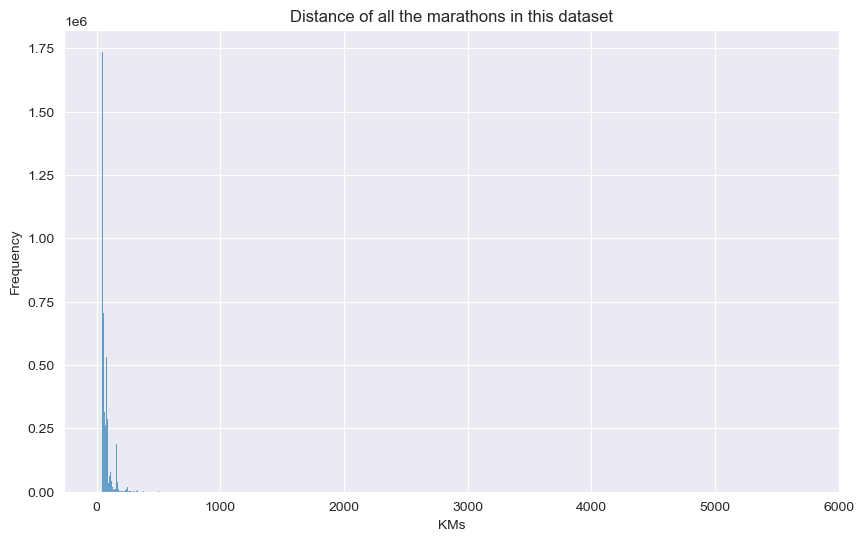

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance_km', bins=1000)
plt.title('Distance of all the marathons in this dataset')
plt.xlabel('KMs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Interpretation

From the Measure of location of the distance of the marathons we can see that the average distance of these marathons are around 78km long and the median sits at 66.8km. Which indicate that most marathons are in fact ultra marathons as they exceed the traditional marathon length of 42.195 kilometres (26 mi 385 yd). Majority of marathons in this dataset is at 50km which right around the border between a traditional marathon and an ultra marathon. The 1st quartile is still in the 50km range while the 3rd quartile is at 95.4km which indicates most marathons are raced in under 24 hours as around 160 km is typically the longest course distance raced in under 24 hours. There are however marathons that span up to a maximum of 5720km. 

### <u> Current Athlete Age analysis <u/>

In [72]:
# Each Athlete has a unique ID. For Current Athlete Age analysis we need to remove duplicate Athlete IDs as if an athlete has attended more than one marathon it will skew the data as their age will be recorded multiple times in the dataset.

# Checking for if duplicates exist
df.duplicated(subset=['Athlete ID']).any()

True

In [73]:
# Dropping all duplicate Athlete IDs. Order does not matter as we are using Athlete birth Year to calculate age thus the age should all be the same for each athlete

dfAdjustedDup = df.drop_duplicates(subset=['Athlete ID'], keep='first')
dfAdjustedDup

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,50.000,46.0,40.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,50.000,43.0,37.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,50.000,37.0,31.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,50.000,48.0,42.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,50.000,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461002,1995,21.01.1995,Mountain Mist 50k (USA),50km,36,5:51:58 h,"*Huntsville, AL",USA,1962.0,F,W23,8524.000,1641158,50.000,62.0,33.0
7461003,1995,21.01.1995,Mountain Mist 50k (USA),50km,36,5:51:58 h,"*Huntsville, AL",USA,1962.0,F,W23,8524.000,1641159,50.000,62.0,33.0
7461046,1995,07.01.1995,Atlanta Fat Ass 50K (USA),50km,22,4:49:50 h,"*Chamblee, GA",USA,1955.0,F,W35,10351.000,1641164,50.000,69.0,40.0
7461052,1995,07.01.1995,Atlanta Fat Ass 50K (USA),50km,22,5:22:10 h,"*Peachtree City, GA",USA,1960.0,F,W23,9312.000,1641165,50.000,64.0,35.0


In [74]:
# Making sure duplicates were dropped

dfAdjustedDup.duplicated(subset=['Athlete ID']).any()

False

In [75]:
print('Number of Current Athlete Ages in this dataset calculation: ' + str(dfAdjustedDup['Current Athlete age'].count()))

Number of Current Athlete Ages in this dataset calculation: 1264189


In [76]:
print('Average Current Athlete Ages in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].sum()/dfAdjustedDup['Current Athlete age'].count()))

Average Current Athlete Ages in this dataset calculation = 50.581633758876244


In [77]:
print('Median of Current Athlete Ages in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].median()))

Median of Current Athlete Ages in this dataset calculation = 49.0


In [78]:
print('Mode of Current Athlete Ages in this dataset calculation = ')
print(dfAdjustedDup['Current Athlete age'].mode())

Mode of Current Athlete Ages in this dataset calculation = 
0    50.0
Name: Current Athlete age, dtype: float64


In [79]:
print('1st Quartile of Current Athlete Ages in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].quantile(0.25)))

1st Quartile of Current Athlete Ages in this dataset calculation = 41.0


In [80]:
print('2nd Quartile of Current Athlete Ages in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].quantile(0.50)))

2nd Quartile of Current Athlete Ages in this dataset calculation = 49.0


In [81]:
print('3nd Quartile of Current Athlete Ages in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].quantile(0.75)))

3nd Quartile of Current Athlete Ages in this dataset calculation = 58.0


In [82]:
print('Smallest Current Athlete Age in list of the marathons in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].min()))

Smallest Current Athlete Age in list of the marathons in this dataset calculation = 4.0


In [83]:
print('Biggest Current Athlete Age in list of the marathons in this dataset calculation = ' + str(dfAdjustedDup['Current Athlete age'].max()))

Biggest Current Athlete Age in list of the marathons in this dataset calculation = 831.0


In [84]:
geometric_mean = gmean(dfAdjustedDup.loc[:,"Current Athlete age"])
print("The Geometric Mean is: " + str(geometric_mean))

The Geometric Mean is: 48.9046426273964


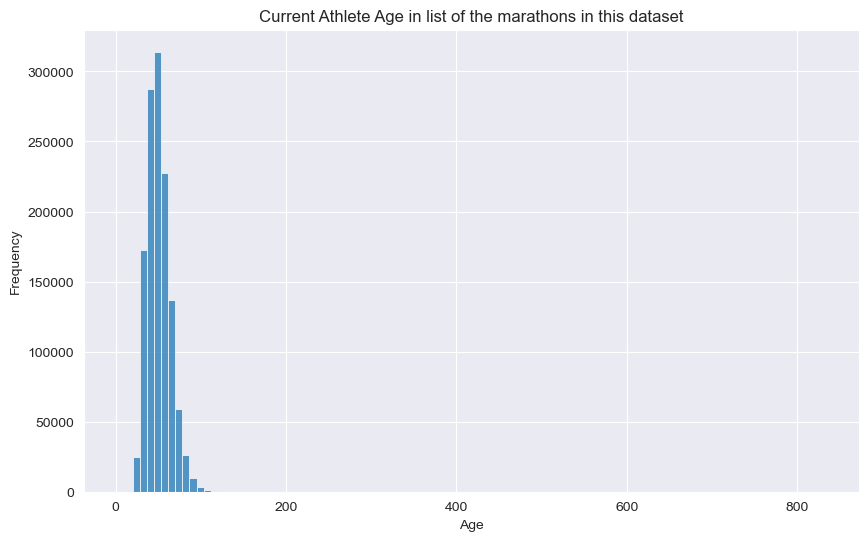

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfAdjustedDup, x='Current Athlete age', bins=100)
plt.title('Current Athlete Age in list of the marathons in this dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [86]:
# If we adjust for ages of people that are still theoretically alive

dfAdjustedAge = dfAdjustedDup.drop(dfAdjustedDup[dfAdjustedDup['Current Athlete age'] >= 120 ].index)

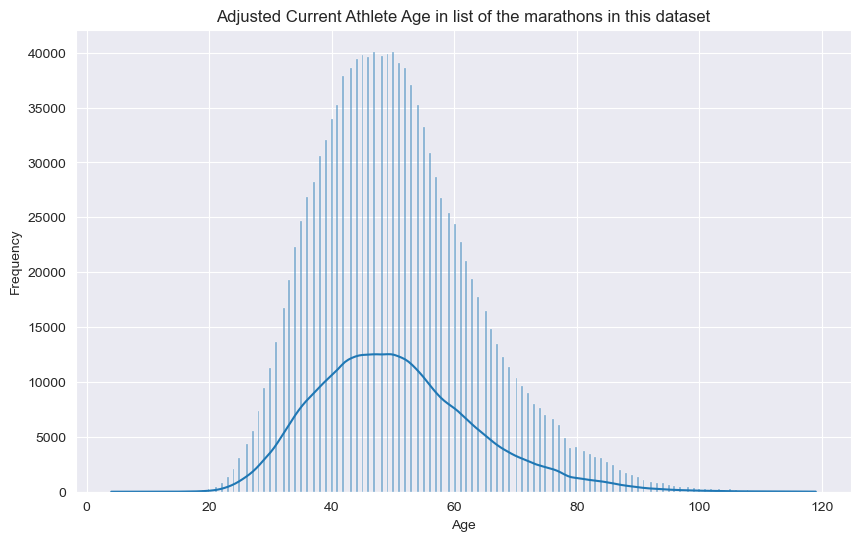

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfAdjustedAge, x='Current Athlete age', kde=True)
plt.title('Adjusted Current Athlete Age in list of the marathons in this dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interpretation

The average current age of the athletes is around 51 rounded and the median is 49 which is right around the middle of a typical 100-year lifespan of people. Most current athletes are in their 50s. The quartiles indicate that 50% of the athletes in the middle of the dataset are between 41 and 58. The min and max of the data may indicate outliers present.

### <u> Athlete age at event Analysis <u/>

In [88]:
print('Number of Athlete Age at event in this dataset calculation: ' + str(df['Athlete age at event'].count()))

Number of Athlete Age at event in this dataset calculation: 6383231


In [89]:
print('Average Athlete Age at event in this dataset calculation = ' + str(df['Athlete age at event'].sum() / df['Athlete age at event'].count()))

Average Athlete Age at event in this dataset calculation = 42.15774331212516


In [90]:
print('Median of Athlete Age at event in this dataset calculation = ' + str(df['Athlete age at event'].median()))

Median of Athlete Age at event in this dataset calculation = 42.0


In [91]:
print('Mode of Athlete Age at event in this dataset calculation = ')
print(df['Athlete age at event'].mode())

Mode of Athlete Age at event in this dataset calculation = 
0    42.0
Name: Athlete age at event, dtype: float64


In [92]:
print('1st Quartile of Athlete Age at event in this dataset calculation = ' + str(df['Athlete age at event'].quantile(0.25)))

1st Quartile of Athlete Age at event in this dataset calculation = 35.0


In [93]:
print('2nd Quartile of Athlete Age at event in this dataset calculation = ' + str(df['Athlete age at event'].quantile(0.50)))

2nd Quartile of Athlete Age at event in this dataset calculation = 42.0


In [94]:
print('3nd Quartile of Athlete Age at event in this dataset calculation = ' + str(df['Athlete age at event'].quantile(0.75)))

3nd Quartile of Athlete Age at event in this dataset calculation = 49.0


In [95]:
print('Smallest Athlete Age at event in list of the marathons in this dataset calculation = ' + str(df['Athlete age at event'].min()))

Smallest Athlete Age at event in list of the marathons in this dataset calculation = 1.0


In [96]:
print('Biggest Athlete Age at event in list of the marathons in this dataset calculation = ' + str(df['Athlete age at event'].max()))

Biggest Athlete Age at event in list of the marathons in this dataset calculation = 827.0


In [97]:
geometric_mean = gmean(df.loc[:, "Athlete age at event"])
print("The Geometric Mean is: " + str(geometric_mean))

The Geometric Mean is: 40.97080129432677


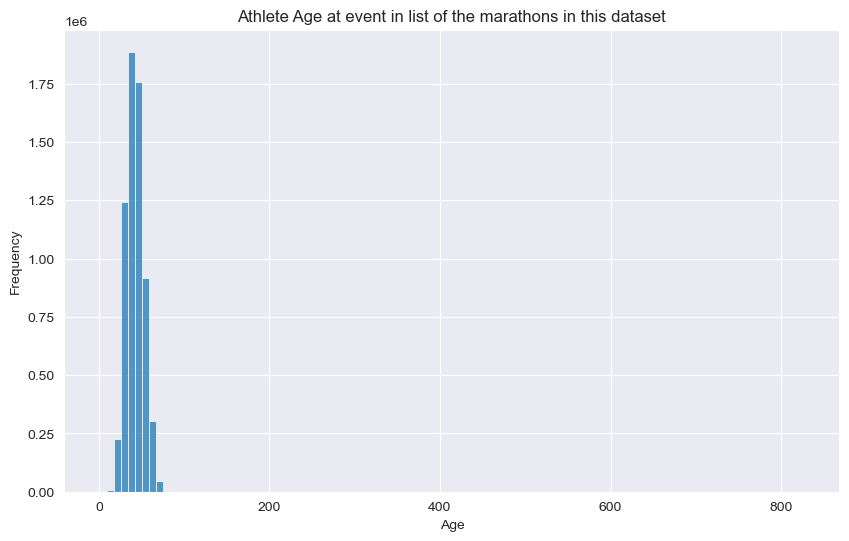

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Athlete age at event', bins=100)
plt.title('Athlete Age at event in list of the marathons in this dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

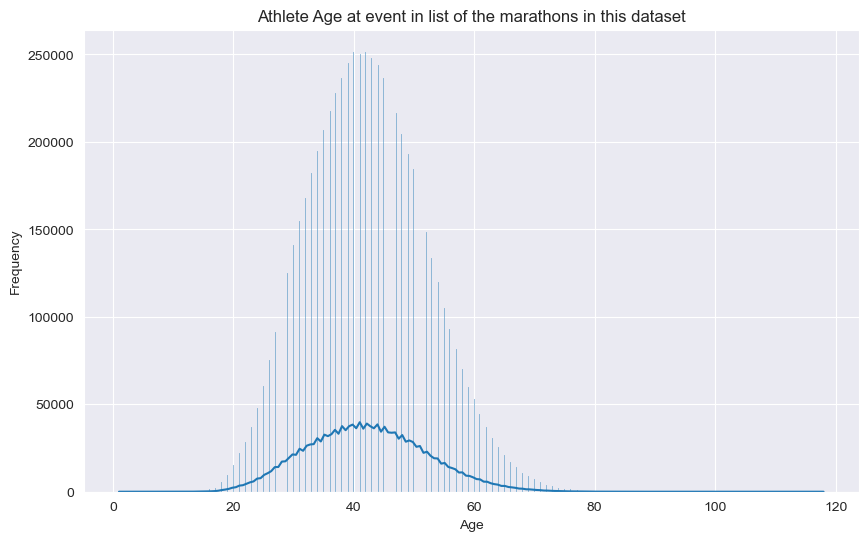

In [99]:
# If we adjust for ages of people that are still theoretically alive and remove data that could be inaccurate

dfAdjustedAge1 = df.drop(df[df['Athlete age at event'] >= 120].index)

plt.figure(figsize=(10, 6))
sns.histplot(data=dfAdjustedAge1, x='Athlete age at event', kde=True)
plt.title('Athlete Age at event in list of the marathons in this dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interpretation 

The Average Athlete Age at the time of the event is 42 years old which matches the median very closely. The quartiles indicate that 50% of the athletes at the time of the event in the middle of the dataset are between 35 and 49. This data gives some insight which I interpret that younger people tend to run less marathons than middle-aged people even though they may be more fit. 

### <u> Athlete average speed Analysis <u/>

In [100]:
print('Number of Athlete average speed data in this dataset calculation: ' + str(df['Athlete average speed'].count()))

Number of Athlete average speed data in this dataset calculation: 6383231


In [101]:
print('Average Athlete average speed in this dataset calculation = ' + str(df['Athlete average speed'].sum() / df['Athlete average speed'].count()))

Average Athlete average speed in this dataset calculation = 769.5448352599177


In [102]:
print('Median of Athlete average speed in this dataset calculation = ' + str(df['Athlete average speed'].median()))

Median of Athlete average speed in this dataset calculation = 7.394


In [103]:
print('Mode of Athlete average speed in this dataset calculation = ')
print(df['Athlete average speed'].mode())

Mode of Athlete average speed in this dataset calculation = 
0    0.0
Name: Athlete average speed, dtype: float64


In [104]:
print('1st Quartile of Athlete average speed in this dataset calculation = ' + str(df['Athlete average speed'].quantile(0.25)))

1st Quartile of Athlete average speed in this dataset calculation = 5.851


In [105]:
print('2nd Quartile of Athlete average speed in this dataset calculation = ' + str(df['Athlete average speed'].quantile(0.50)))

2nd Quartile of Athlete average speed in this dataset calculation = 7.394


In [106]:
print('3nd Quartile of Athlete average speed in this dataset calculation = ' + str(df['Athlete average speed'].quantile(0.75)))

3nd Quartile of Athlete average speed in this dataset calculation = 9.116


In [107]:
print('Lowest Athlete average speed in list of the marathons in this dataset calculation = ' + str(df['Athlete average speed'].min()))

Lowest Athlete average speed in list of the marathons in this dataset calculation = 0.0


In [108]:
print('Highest Athlete average speed in list of the marathons in this dataset calculation = ' + str(df['Athlete average speed'].max()))

Highest Athlete average speed in list of the marathons in this dataset calculation = 29644.0


In [109]:
geometric_mean = gmean(df.loc[:, "Athlete average speed"])
print("The Geometric Mean is: " + str(geometric_mean))

The Geometric Mean is: 0.0


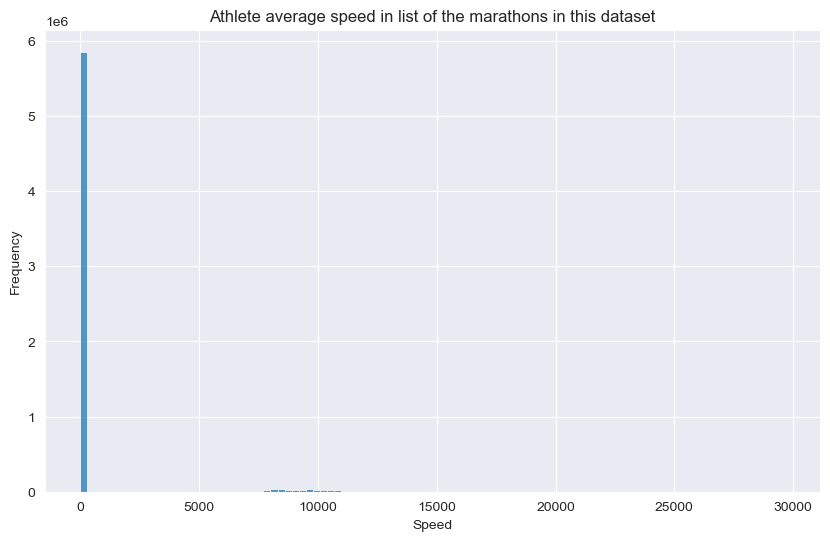

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Athlete average speed', bins=100)
plt.title('Athlete average speed in list of the marathons in this dataset')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interpretation

No units of measurement were given and looking at the data my initial thoughts were that it was in miles per hour or Kilometers per hour but due to the range of the numbers I feel that this column can not be used in my analysis due to very uncertain units and seemly big outliers. 

## End of Measure of Location

## Measures of Variability
### <u> Distance analysis <u/>

In [111]:
print('The range of distances of all the marathons in this dataset calculation = ' + str((df['distance_km'].max())-(df['distance_km'].min())))

The range of distances of all the marathons in this dataset calculation = 5695.09436


In [112]:
print('The inter quartile range of distances of all the marathons in this dataset calculation = ' + str((df['distance_km'].quantile(0.75))-(df['distance_km'].quantile(0.25))))

The inter quartile range of distances of all the marathons in this dataset calculation = 45.400000000000006


In [113]:
print('The variance of distances of all the marathons in this dataset = ' + str(df['distance_km'].var()))

The variance of distances of all the marathons in this dataset = 2617.9366146395437


In [114]:
print('The standard deviation of distances of all the marathons in this dataset = ' + str(df['distance_km'].std()))

The standard deviation of distances of all the marathons in this dataset = 51.165775813912404


In [115]:
print('The Coefficient of Variation of distances of all the marathons in this dataset = ' + str(df['distance_km'].std()/df['distance_km'].mean()*100))

The Coefficient of Variation of distances of all the marathons in this dataset = 65.6258991094438


Interpretation

The range of distances is very big between the shortest marathon and the longest. The middle 50% of the data contains 45km difference which compared to the range we can see that there are quite big outliers. The variance is showing a very large spread of data. The average distance from the mean is around 51km. The Coefficient of Variation shows that the relative spread of the data is 65.63 percent of the mean which indicates a higher spread of the dataset. This all shows quite a big spread of distances among the different marathons.

### <u> Current Athlete Age analysis <u/>

In [116]:
print('The range of Current Athlete Age of all the marathons in this dataset calculation = ' + str((dfAdjustedDup['Current Athlete age'].max())-(dfAdjustedDup['Current Athlete age'].min())))

The range of Current Athlete Age of all the marathons in this dataset calculation = 827.0


In [117]:
print('The inter quartile range of Current Athlete Age of all the marathons in this dataset calculation = ' + str((dfAdjustedDup['Current Athlete age'].quantile(0.75))-(dfAdjustedDup['Current Athlete age'].quantile(0.25))))

The inter quartile range of Current Athlete Age of all the marathons in this dataset calculation = 17.0


In [118]:
print('The variance of Current Athlete Age of all the marathons in this dataset = ' + str(dfAdjustedDup['Current Athlete age'].var()))

The variance of Current Athlete Age of all the marathons in this dataset = 177.1206629118932


In [119]:
print('The standard deviation of Current Athlete Age of all the marathons in this dataset = ' + str(dfAdjustedDup['Current Athlete age'].std()))

The standard deviation of Current Athlete Age of all the marathons in this dataset = 13.30866871298152


In [120]:
print('The Coefficient of Variation of Current Athlete Age of all the marathons in this dataset = ' + str(dfAdjustedDup['Current Athlete age'].std()/dfAdjustedDup['Current Athlete age'].mean()*100))

The Coefficient of Variation of Current Athlete Age of all the marathons in this dataset = 26.311267003403323


Interpretation

The range here shows that the dataset has a wide variety of ages recorded which includes people born in the very early days of the first marathons. The inter-quartile range shows that the middle 50% of the data is actually narrow in comparison with the difference in ages only being 17 years. The variance shows a large spread of data. The average distance from the mean is around 13.3km. The Coefficient of Variation shows that the relative spread of the data is 26.3 percent of the mean which indicates a moderate spread of the dataset.

### <u> Athlete age at event Analysis <u/>

In [121]:
print('The range of Athlete age at the event of all the marathons in this dataset calculation = ' + str((df['Athlete age at event'].max())-(df['Athlete age at event'].min())))

The range of Athlete age at the event of all the marathons in this dataset calculation = 826.0


In [122]:
print('The inter quartile range of Athlete age at the event of all the marathons in this dataset calculation = ' + str((df['Athlete age at event'].quantile(0.75))-(df['Athlete age at event'].quantile(0.25))))

The inter quartile range of Athlete age at the event of all the marathons in this dataset calculation = 14.0


In [123]:
print('The variance of Athlete age at the event of all the marathons in this dataset = ' + str(df['Athlete age at event'].var()))

The variance of Athlete age at the event of all the marathons in this dataset = 97.33411805105456


In [124]:
print('The standard deviation of Athlete age at the event of all the marathons in this dataset = ' + str(df['Athlete age at event'].std()))

The standard deviation of Athlete age at the event of all the marathons in this dataset = 9.865805494284517


In [125]:
print('The Coefficient of Variation of Athlete age at the event of all the marathons in this dataset = ' + str(df['Athlete age at event'].std()/df['Athlete age at event'].mean()*100))

The Coefficient of Variation of Athlete age at the event of all the marathons in this dataset = 23.4021195613831


Interpretation

The range here shows a similar story to the Age of Athletes Now that the dataset has a wide variety of ages. The inter-quartile range is also narrow. The analysis shows that the data is more tighter towards the center. 

## End of Measure of Variability

## Measures of Distribution Shape, Relative Location, and Detecting Outliers
### <u> Distance analysis <u/>

In [126]:
print('The Skewness of distances of all the marathons in this dataset calculation = ' + str((df['distance_km'].skew())))

The Skewness of distances of all the marathons in this dataset calculation = 34.376204405984375


In [127]:
print('The kurtosis of distances of all the marathons in this dataset calculation = ' + str((df['distance_km'].kurtosis())))

The kurtosis of distances of all the marathons in this dataset calculation = 2930.8204609148465


In [130]:
df['zScore_distance_km'] = zscore(df['distance_km'])

In [131]:
df[['distance_km','zScore_distance_km']]

,distance_km,zScore_distance_km
0,50.000,-0.546573
1,50.000,-0.546573
2,50.000,-0.546573
3,50.000,-0.546573
4,50.000,-0.546573
...,...,...
7461183,80.467,0.048884
7461184,80.467,0.048884
7461185,80.467,0.048884
7461186,61.300,-0.325722


In [135]:
df[(df['zScore_distance_km'] <= (-3)) & (df['zScore_distance_km'] >= 3)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event,zScore_distance_km


<Axes: >

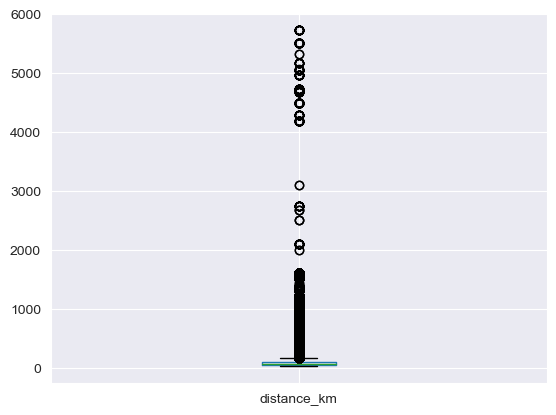

In [136]:
df.boxplot(column='distance_km')

Interpretation

The data is extremely skewed to the right. Due to a high kurtosis, this distribution has more tail data than normally distributed data. After calculating the z-scores non were below -3 and above 3, which indicates no outliers. 

### <u> Current Athlete Age analysis <u/>

In [137]:
print('The Skewness of the Current Athlete Age of all the marathons in this dataset calculation = ' + str((dfAdjustedDup['Current Athlete age'].skew())))

The Skewness of the Current Athlete Age of all the marathons in this dataset calculation = 0.9204210195692873


In [138]:
print('The kurtosis of the Current Athlete Age of all the marathons in this dataset calculation = ' + str((dfAdjustedDup['Current Athlete age'].kurtosis())))

The kurtosis of the Current Athlete Age of all the marathons in this dataset calculation = 10.678564510517411


In [139]:
dfAdjustedDup['zScore_Current Athlete age'] = zscore(dfAdjustedDup['Current Athlete age'])

C:\Users\pangk\AppData\Local\Temp\ipykernel_19688\1018650716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAdjustedDup['zScore_Current Athlete age'] = zscore(dfAdjustedDup['Current Athlete age'])


In [140]:
dfAdjustedDup[['Current Athlete age','zScore_Current Athlete age']]

,Current Athlete age,zScore_Current Athlete age
0,46.0,-0.344259
1,43.0,-0.569677
2,37.0,-1.020511
3,48.0,-0.193981
4,32.0,-1.396206
...,...,...
7461002,62.0,0.857965
7461003,62.0,0.857965
7461046,69.0,1.383938
7461052,64.0,1.008243


In [141]:
dfAdjustedDup[(dfAdjustedDup['zScore_Current Athlete age'] <= (-3)) & (dfAdjustedDup['zScore_Current Athlete age'] >= 3)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event,zScore_Current Athlete age


<Axes: >

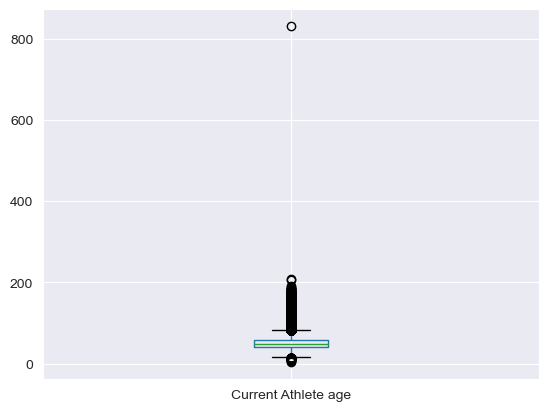

In [142]:
dfAdjustedDup.boxplot(column='Current Athlete age')

<Axes: >

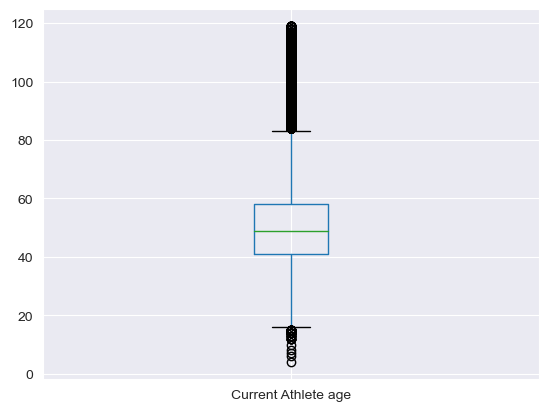

In [146]:
# If we adjust for ages of people that are still theoretically alive

dfAdjustedAge.boxplot(column='Current Athlete age')

Interpretation

The data is moderately skewed to the right. Due to a high kurtosis, this distribution has more tail data than normally distributed data. After calculating the z-scores non were below -3 and above 3, which indicates no outliers. 

### <u> Athlete age at event Analysis <u/>

In [144]:
print('The Skewness of Athlete age at event of all the marathons in this dataset calculation = ' + str((df['Athlete age at event'].skew())))

The Skewness of Athlete age at event of all the marathons in this dataset calculation = 0.31199486590520414


In [147]:
print('The kurtosis of Athlete age at event of all the marathons in this dataset calculation = ' + str((df['Athlete age at event'].kurtosis())))

The kurtosis of Athlete age at event of all the marathons in this dataset calculation = 6.1495134406612895


In [148]:
df['zScore_Athlete age at event'] = zscore(df['Athlete age at event'])

In [149]:
df[['Athlete age at event', 'zScore_Athlete age at event']]

,Athlete age at event,zScore_Athlete age at event
0,40.0,-0.218709
1,37.0,-0.522790
2,31.0,-1.130951
3,42.0,-0.015989
4,26.0,-1.637752
...,...,...
7461183,61.0,1.909855
7461184,44.0,0.186732
7461185,48.0,0.592172
7461186,30.0,-1.232311


In [150]:
df[(df['zScore_Athlete age at event'] <= (-3)) & (df['zScore_Athlete age at event'] >= 3)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,distance_km,Current Athlete age,Athlete age at event,zScore_distance_km,zScore_Athlete age at event


<Axes: >

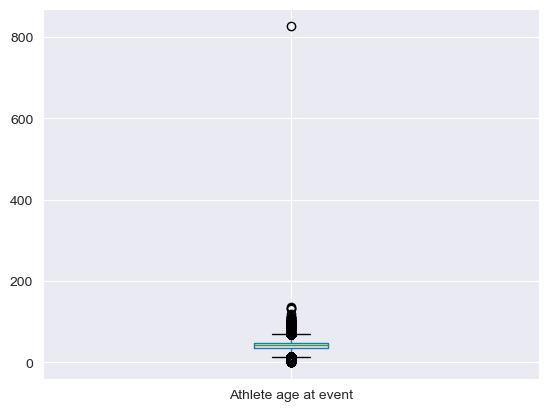

In [151]:
df.boxplot(column='Athlete age at event')

<Axes: >

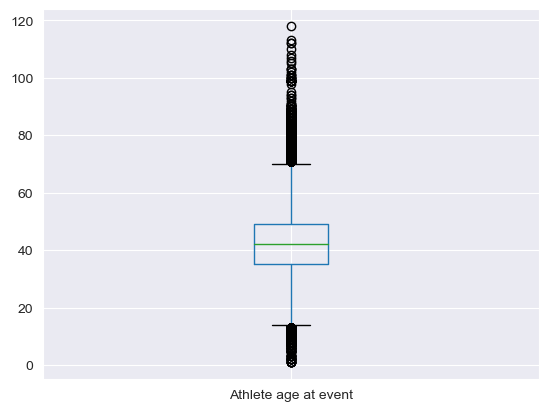

In [152]:
# If we adjust for ages of people that are still theoretically alive

dfAdjustedAge1.boxplot(column='Athlete age at event')

Interpretation

The data is moderately skewed to the right. Due to a high kurtosis, this distribution has more tail data than normally distributed data. After calculating the z-scores non were below -3 and above 3, which indicates no outliers. 

## End of Measures of Distribution Shape, Relative Location, and Detecting Outliers

## Exploratory Data Analysis
### <u> Distance analysis <u/>

In [153]:
df['distance_km'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min      24.50000
25%      50.00000
50%      66.80000
75%      95.40000
max    5719.59436
Name: distance_km, dtype: float64

### <u> Current Athlete Age analysis <u/>

In [154]:
dfAdjustedDup['Current Athlete age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min      4.0
25%     41.0
50%     49.0
75%     58.0
max    831.0
Name: Current Athlete age, dtype: float64

### <u> Athlete age at event Analysis <u/>

In [155]:
df['Athlete age at event'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min      1.0
25%     35.0
50%     42.0
75%     49.0
max    827.0
Name: Athlete age at event, dtype: float64

## End of Exploratory Data Analysis

## Measures of Association
### ### <u> Distance vs speed analysis <u/>

In [156]:
# Sample Covariance

df['distance_km'].cov(df['Athlete average speed'])

4309.892597684738

In [159]:
# Correlation Coefficient

df['distance_km'].corr(df['Athlete average speed'])

0.03224361828020924

<Axes: xlabel='distance_km', ylabel='Athlete average speed'>

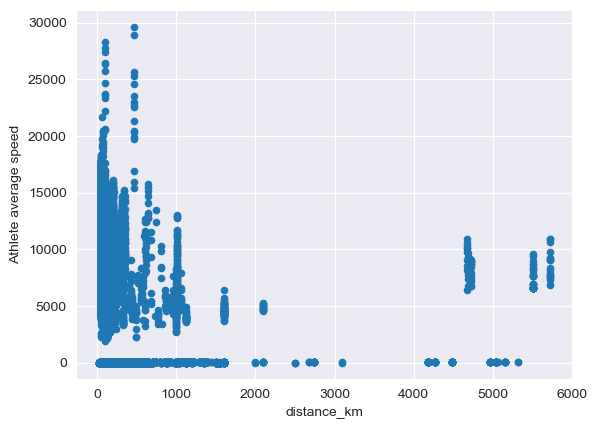

In [164]:
df.plot.scatter(x='distance_km', y='Athlete average speed')

Interpretation

The sample Covariance indicates a positive relationship between the distance of the marathon and the average speed. Which indicates that the longer the marathon is, the faster the average speed. The Correlation Coefficient shows a very weak positive relationship between distance and average speed.

In [172]:
df[df['Athlete average speed'] <= 0]['Athlete average speed'].count()

2282

In [162]:
# Sample Covariance

df['Athlete age at event'].cov(df['Athlete average speed'])

-3450.0969631821604

In [163]:
# Correlation Coefficient

df['Athlete age at event'].corr(df['Athlete average speed'])

-0.13386148507868129

<Axes: xlabel='Athlete age at event', ylabel='Athlete average speed'>

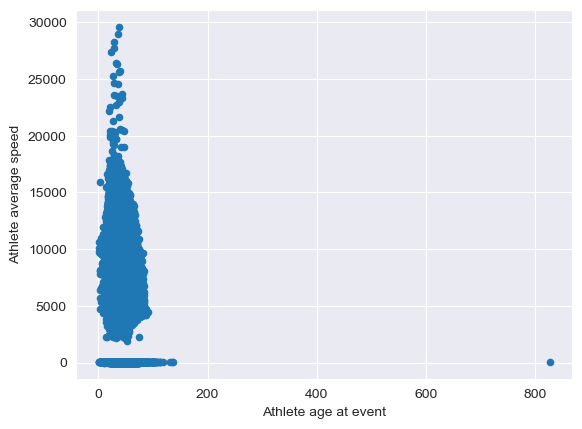

In [165]:
df.plot.scatter(x='Athlete age at event', y='Athlete average speed')

<Axes: xlabel='Athlete age at event', ylabel='Athlete average speed'>

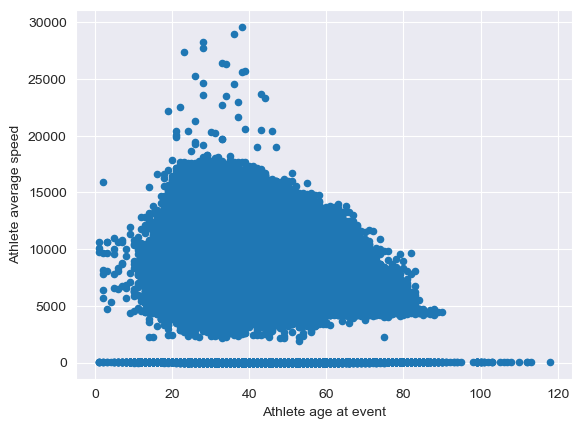

In [167]:
# If we adjust for ages of people that are theoretically alive at the time of the event

dfAdjustedAge1.plot.scatter(x='Athlete age at event', y='Athlete average speed')

In [169]:
# Sample Covariance

dfAdjustedAge1['Athlete age at event'].cov(dfAdjustedAge1['Athlete average speed'])

-3449.9721474024204

In [170]:
# Correlation Coefficient

dfAdjustedAge1['Athlete age at event'].corr(dfAdjustedAge1['Athlete average speed'])

-0.13392569658909967

Interpretation

The Sample Covariance shows a negative relationship between the athlete's age at the event and the athlete's average speed. The Correlation Coefficient shows a negative weak relationship. This indicates that the older the athlete's age is at the event, the slower the athlete's average speed. This result shows that younger athletes tend to be faster as they are fitter than older athletes.

### <u> Athlete age at event vs Distance Analysis <u/>

In [160]:
# Sample Covariance

df['Athlete age at event'].cov(df['distance_km'])

17.52713910731201

In [161]:
# Correlation Coefficient

df['Athlete age at event'].corr(df['distance_km'])

0.034721535341947475

<Axes: xlabel='Athlete age at event', ylabel='distance_km'>

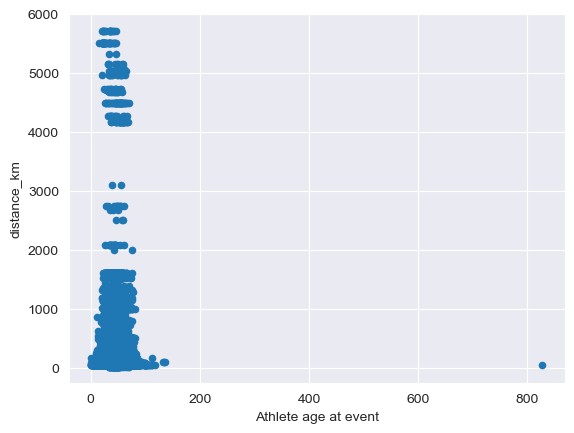

In [166]:
df.plot.scatter(x='Athlete age at event', y='distance_km')

<Axes: xlabel='Athlete age at event', ylabel='distance_km'>

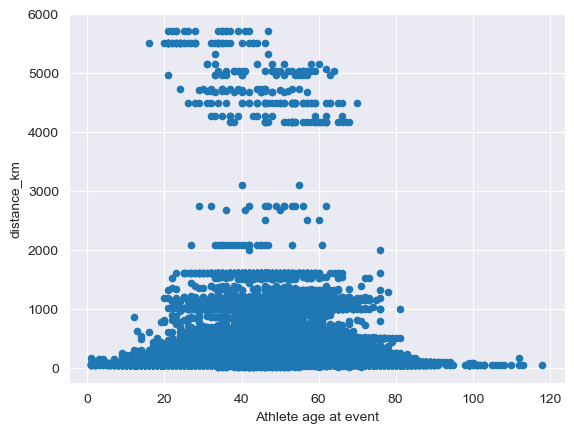

In [168]:
# If we adjust for ages of people that are still theoretically alive

dfAdjustedAge1.plot.scatter(x='Athlete age at event', y='distance_km')

Interpretation

Sample Covariance shows a positive relationship between the athlete's age at the event and the distance of the marathons they ran. The Correlation Coefficient shows a very weak relationship. The relationship indicates that there is a very small likelihood that the older athletes run longer distance marathons. 

# Final summary

The analysis of marathon data shows that the marathons are on average longer than the traditional 42km distance, with most marathons falling around 50km. The athlete ages also skew older, with the average athlete being around 51 years old. There is a wider spread in marathon distances compared to athlete ages. The data suggests a weak positive correlation between marathon distance and average speed, and a weak negative correlation between athlete age and average speed, indicating that longer marathons tend to be run at faster speeds and younger athletes tend to be faster.

# Reflections on your learnings

The major reflections on learning between this assignment and the last assignment are the difference in the learning curve as well as functionality. I have never used Python and Jupyter Notebook in terms of data science before, so it required a steeper learning curve, while Excel was more familiar to me as I have used it quite often, even though not to this extent. This assignment also showed me how Python was able to deal with very large datasets much better than Excel, even to the point where Excel could not even load my data completely due to the large number of rows. Excel seems like a great tool to use for quick data exploration or small to medium dataset analysis. However, Python is so much better for more professional data science. Its ability to handle large datasets, automate tasks, and integrate with various data sources makes it a more versatile tool. 
If I could do this assignment over, I would spend more time researching the various functions of Python for data science, as there are many functions that could have made it easier to do what I did manually. Another point is to spend more time thinking and learning about how to deal with null data and how I could have rebuilt some of those data points rather than just removing them. 
I had to rely on Google a lot regarding functions in Python, things like correlation and z-scores I had no idea how to do in Python. 
This assignment has really taught me a lot about data science and how to utilise Python to analysis large quantities of data that Excel could not handle.